In [1]:
import csv
import pandas as pd
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
from config import password
import psycopg2

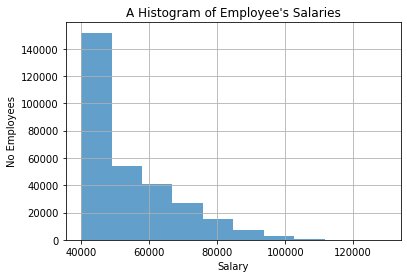

In [4]:
# Connecting through psycopy2 
# Need to give credit to Daniel Love (UO Bootcamp Dec 2019) for psycopg2 connection code

conn = psycopg2.connect(database = 'EmployeeDB__SQL_Challenge', user = 'postgres',                                           
             password = password, host = '127.0.0.1', port = '5432')
salary_data = pd.read_sql("SELECT * FROM salaries", conn)
conn.close()
salary_data.hist(column='salary', alpha=0.7)
plt.xlabel('Salary')
plt.ylabel('No Employees')
plt.title('A Histogram of Employee\'s Salaries')
plt.show()

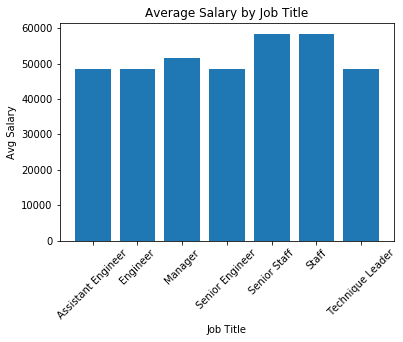

In [5]:
conn = psycopg2.connect(database = 'EmployeeDB__SQL_Challenge', user = 'postgres',                                           
             password = password, host = '127.0.0.1', port = '5432')
titles_data = pd.read_sql("SELECT * FROM titles", conn)
titles_data.head()
conn.close()

# Merge data
df_merged = pd.merge(salary_data, titles_data, on="emp_no", how="left")
df_merged.head()
df_avg_salary = df_merged.groupby("title", as_index=False)['salary'].mean()
df_avg_salary.head()
plt.bar(df_avg_salary['title'], df_avg_salary['salary'])
plt.xticks(rotation=45)
plt.xlabel("Job Title")
plt.ylabel("Avg Salary")
plt.title("Average Salary by Job Title")
plt.show()
